# Análise de Embeddings e Redução da Dimensionalidade

**Objetivo.** Dado um conjunto de textos, gerar embeddings com BERT e investigar a estrutura dos dados via PCA, t-SNE e UMAP. Em seguida, identificar clusters e relacioná-los a categorias semânticas.

In [ ]:
sentences = [
    'I swap butter for olive oil in many recipes.',
    'Canberra is the capital of Australia.',
    'Ottawa is the capital city of Canada.',
    'Paris is the most populated city in France.',
    'Tokyo is among the most populous metropolitan areas worldwide.',
    'I prefer my coffee with no sugar and a splash of milk.',
    'The recipe for pasta carbonara is simple.',
    'A pinch of salt enhances sweetness in desserts.',
    'Alignment techniques reduce harmful outputs.',
    'Explainable AI highlights salient features for decisions.',
    'Transformer models enable long-range language dependencies.',
    'Black swan events stress-test portfolio resilience.',
    'The Sahara Desert spans much of North Africa.',
    'Inflation erodes real purchasing power of cash.',
    'Aromatics like garlic and onion build flavor early.',
    'Value stocks trade at lower multiples relative to fundamentals.',
    'Quantization reduces memory with minimal accuracy loss.',
    'Tax-loss harvesting offsets capital gains.',
    'Investing in technology can be risky.',
    'Fermented foods add acidity and complexity.',
    'Marinating tofu improves texture and taste.',
    'Vector databases power semantic search at scale.',
    'Distillation transfers knowledge from large to small models.',
    'The Great Barrier Reef lies off Australia’s northeast coast.',
    'Retrieval-augmented generation grounds answers in sources.',
    'Iceland lies on the Mid-Atlantic Ridge.',
    'The Baltic states border the eastern Baltic Sea.',
    'Multimodal learning aligns text with images and audio.',
    'Risk tolerance should guide position sizing.',
    'Time in the market beats timing the market.',
    'Behavioral biases can derail investment plans.',
    'Reinforcement learning fine-tunes policies from human feedback.',
    'Edge AI runs models under strict latency constraints.',
    'Deglazing lifts browned bits to make pan sauces.',
    'Tempering chocolate stabilizes cocoa butter crystals.',
    'What is the capital of France?',
    'Johannesburg is a major city but not South Africa’s capital.',
    'The Danube passes through multiple European capitals.',
    'The Amazon River carries one of the largest water volumes on Earth.',
    'A healthy emergency fund reduces forced selling.',
    'I batch-cook grains for quick lunches.',
    'Resting steak helps redistribute the juices.',
    'The Atacama is one of the driest deserts on the planet.',
    'Liquidity risk rises when trading volumes are thin.',
    'Mount Everest is the highest peak above sea level.',
    'Graph neural networks capture relational structure.',
    'Sourdough starter needs regular feedings to stay active.',
    'The stock market experienced a drop today.',
    'Umami-rich ingredients deepen savory dishes.',
    'Al dente pasta retains a slight bite after cooking.',
    'Rebalancing restores target asset allocation.',
    'Continual learning mitigates catastrophic forgetting.',
    'Bond duration measures sensitivity to interest-rate changes.',
    'Diffusion models synthesize high-fidelity images.',
    'Expense ratios compound against long-term returns.',
    'Self-supervised pretraining reduces labeled data needs.',
    'What country contains the city of Kyoto?',
    'Stir-frying requires high heat and constant movement.',
    'Covered calls generate income with capped upside.',
    'The Nile flows northward into the Mediterranean Sea.',
    'Causal inference distinguishes correlation from effect.',
    'Prompt engineering steers generative behavior reliably.',
    'Few-shot prompting improves generalization on new tasks.',
    'Growth investing prioritizes earnings expansion.',
    'The Alps stretch across several central European countries.',
    'The Andes form a continuous mountain range along South America.',
    'I cook vegetarian meals on weekdays to simplify planning.',
    'Natural language processing has advanced greatly.',
    'Sous-vide delivers precise temperature control.',
    'Diversification reduces idiosyncratic risk across holdings.',
    'Sharpe ratio evaluates risk-adjusted performance.',
    'Artificial intelligence is transforming the world.',
    'Credit spreads widen during economic uncertainty.',
    'Emerging markets add diversification but higher volatility.',
    'Mise en place speeds up weeknight cooking.',
    'The Caspian Sea is a landlocked body of water.',
    'Evaluation with benchmarks must avoid data leakage.',
    'Cairo sits along the Nile River delta.',
    'Federated learning trains models without centralizing data.',
    'Lagos is Nigeria’s largest city by population.',
    'Dollar-cost averaging smooths entry price over time.',
    'LoRA adapters enable efficient fine-tuning.',
    'I keep a jar of homemade pesto for pasta.',
    'New Delhi serves as the seat of India’s government.',
    'I like to cook Italian dishes on Sundays.',
    'Roasting vegetables caramelizes natural sugars.',
    'ETFs provide broad market exposure with intraday liquidity.',
    'Proofing time affects a bread’s crumb structure.'
]

## Predição dos Embeddings

Utilize o modelo BERT pré-treinado para gerar embeddings de todos os textos fornecidos.  
O objetivo é obter uma matriz `X` com formato **(N, dim)**, onde **N** é o número de textos e **dim** é a dimensionalidade dos vetores de embedding.

In [ ]:
!pip install sentence-transformers torch scikit-learn matplotlib seaborn pandas umap-learn -q

In [ ]:
import torch
import numpy as np
from sentence_transformers import SentenceTransformer

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
model = SentenceTransformer(model_name, device=device)

print(f"Dimensão do embedding: {model.get_sentence_embedding_dimension()}")

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Dimensão do embedding: 384


In [ ]:
sentence_embeddings = model.encode(sentences)

print(f"Shape da matriz de embeddings: {sentence_embeddings.shape}")
print(f"Embedding da primeira sentença:\n{sentence_embeddings[0][:10]}...")

Shape da matriz de embeddings: (88, 384)
Embedding da primeira sentença:
[-0.05245963 -0.07178463  0.0277141   0.01968163  0.00380771 -0.03920021
 -0.07099454 -0.00496351  0.0350052  -0.10759939]...


## PCA

Aplique **PCA (Principal Component Analysis)** para projetar os embeddings em duas dimensões e visualizar a estrutura global dos dados.  
O PCA ajuda a capturar as direções de maior variância e pode indicar agrupamentos lineares.

**Tarefas:**
- Reduza a dimensionalidade dos embeddings para 2 componentes principais.  
- Plote os pontos resultantes com `matplotlib`, identificando possíveis agrupamentos.  
- Analise qualitativamente se há separação entre textos de temas distintos.

In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # 1. Centralizar os dados (subtrair a média)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # 2. Calcular a matriz de covariância
        # rowvar=False indica que as colunas são as variáveis
        cov_matrix = np.cov(X_centered, rowvar=False)

        # 3. Calcular autovetores e autovalores
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # 4. Ordenar autovetores pelos autovalores em ordem decrescente
        # Os autovetores são as colunas da matriz `eigenvectors`
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # 5. Armazenar os `n_components` primeiros autovetores
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # Centralizar os dados usando a média do treino
        X_centered = X - self.mean

        # Projetar os dados nos componentes
        # (n_samples, n_features) @ (n_features, n_components) -> (n_samples, n_components)
        X_projected = np.dot(X_centered, self.components.T)

        return X_projected

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [ ]:
from sklearn.decomposition import PCA

# Instanciar e aplicar o PCA
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(sentence_embeddings)

print("Dimensão dos dados originais:", sentence_embeddings.shape)
print("Dimensão dos dados transformados:", pca_embeddings.shape)

Dimensão dos dados originais: (88, 384)
Dimensão dos dados transformados: (88, 2)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Padronizando as características
scaler = StandardScaler()
pca_embeddings_scaled = scaler.fit_transform(pca_embeddings)

# A média de cada coluna agora é próxima de 0
print("Média após padronização:", np.mean(pca_embeddings_scaled, axis=0))
# O desvio padrão de cada coluna agora é próximo de 1
print("Desvio padrão após padronização:", np.std(pca_embeddings_scaled, axis=0))

Média após padronização: [1.08372085e-08 8.12790635e-09]
Desvio padrão após padronização: [1. 1.]


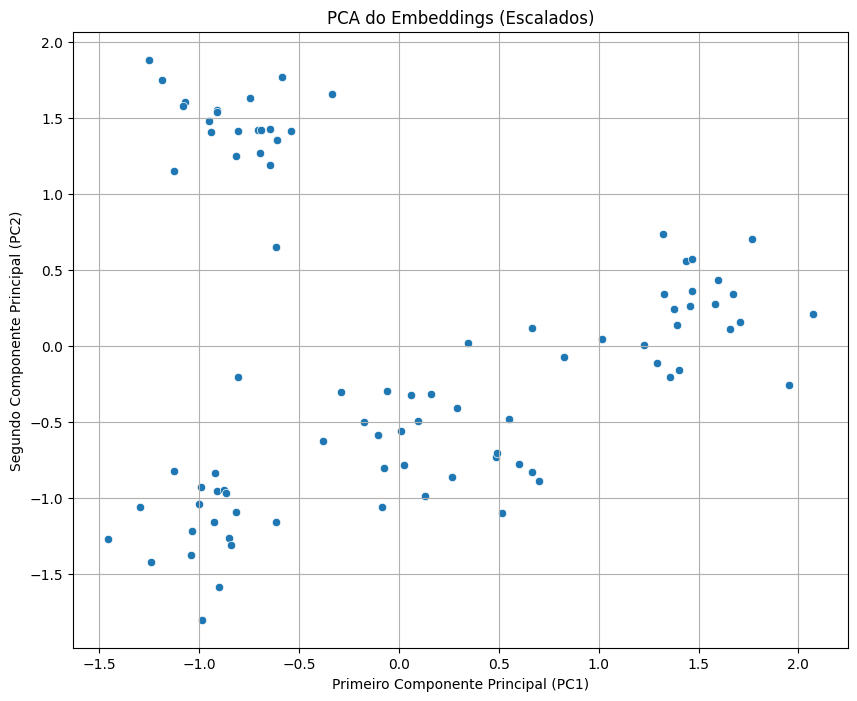

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_embeddings_scaled[:, 0], y=pca_embeddings_scaled[:, 1])
plt.title('PCA do Embeddings (Escalados)')
plt.xlabel('Primeiro Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.grid(True)
plt.show()

## t-SNE

Use **t-SNE (t-distributed Stochastic Neighbor Embedding)** para investigar a estrutura local dos dados.  
Diferente do PCA, o t-SNE tenta preservar vizinhanças locais e pode revelar grupos mais sutis.

**Tarefas:**
- Reduza os embeddings para 2D usando `TSNE` do `scikit-learn`.  
- Ajuste parâmetros como `perplexity` e `learning_rate` para comparar resultados.  
- Visualize o mapa e observe se os textos semelhantes ficam próximos.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(sentence_embeddings)

print("Dimensão dos dados originais:", sentence_embeddings.shape)
print("Dimensão dos dados transformados:", tsne_embeddings.shape)

Dimensão dos dados originais: (88, 384)
Dimensão dos dados transformados: (88, 2)


In [ ]:
class TSNE:
    def __init__(self, n_components=2, perplexity=30.0, lr=200.0, n_iter=500):
        # Número de dimensões finais, perplexidade, taxa de aprendizado e iterações
        self.n_components = n_components
        self.perplexity = perplexity
        self.lr = lr
        self.n_iter = n_iter

    # -------------------------------------------------------
    # 1. Calcula matriz de distâncias euclidianas ao quadrado
    # -------------------------------------------------------
    def _distances(self, X):
        sum_X = np.sum(X**2, axis=1)
        return np.add(np.add(-2 * X @ X.T, sum_X).T, sum_X)

    # -------------------------------------------------------------------------
    # 2. Calcula a matriz P (probabilidades no espaço de alta dimensão)
    #    Cada linha P[i] é ajustada para ter uma entropia que corresponda à perplexidade
    # -------------------------------------------------------------------------
    def _p_matrix(self, D):
        n = D.shape[0]
        P = np.zeros((n, n))
        logU = np.log2(self.perplexity)

        for i in range(n):
            beta = 1.0  # inverso da variância (1 / (2*sigma²))
            Di = np.delete(D[i], i)  # remove a distância com ele mesmo

            # Ajuste de beta por busca simples até alcançar a perplexidade desejada
            for _ in range(30):
                P_i = np.exp(-Di * beta)
                P_i /= np.sum(P_i)
                H = -np.sum(P_i * np.log2(P_i + 1e-12))  # entropia
                if abs(H - logU) < 1e-3:  # se já está próximo, para
                    break
                beta *= 1.2 if H > logU else 0.8  # ajusta beta

            P[i, np.arange(n) != i] = P_i

        # Simetriza e normaliza
        P = (P + P.T) / (2 * n)
        return np.maximum(P, 1e-12)

    # -------------------------------------------------------
    # 3. Executa o t-SNE e retorna o embedding 2D
    # -------------------------------------------------------
    def fit_transform(self, X):
        n = X.shape[0]

        # Calcula afinidades no espaço original (P)
        D = self._distances(X)
        P = self._p_matrix(D)

        # Inicializa o embedding aleatoriamente
        Y = np.random.randn(n, self.n_components)

        # Loop de otimização
        for it in range(self.n_iter):
            # Calcula afinidades no espaço de baixa dimensão (Q)
            sum_Y = np.sum(Y**2, axis=1)
            num = 1 / (1 + np.add(np.add(-2 * Y @ Y.T, sum_Y).T, sum_Y))
            np.fill_diagonal(num, 0)
            Q = np.maximum(num / np.sum(num), 1e-12)

            # Calcula o gradiente
            PQ = P - Q
            for i in range(n):
                # Soma ponderada das diferenças (força de atração/repulsão)
                dY_i = np.sum((PQ[:, i] * num[:, i])[:, None] * (Y[i] - Y), axis=0)
                Y[i] -= self.lr * dY_i  # Atualiza posição

            # Centraliza os pontos
            Y -= np.mean(Y, axis=0)

            # Mostra custo a cada 100 iterações
            if (it + 1) % 100 == 0:
                cost = np.sum(P * np.log(P / Q))
                print(f"Iter {it+1:4d}: cost = {cost:.4f}")

        return Y

In [ ]:
custom_tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, lr=200)
X_embedded_custom = custom_tsne.fit_transform(tsne_embeddings)

Iter  100: cost = 0.0867
Iter  200: cost = 0.0856
Iter  300: cost = 0.0856
Iter  400: cost = 0.0855
Iter  500: cost = 0.0855
Iter  600: cost = 0.0855
Iter  700: cost = 0.0855
Iter  800: cost = 0.0855
Iter  900: cost = 0.0855
Iter 1000: cost = 0.0855


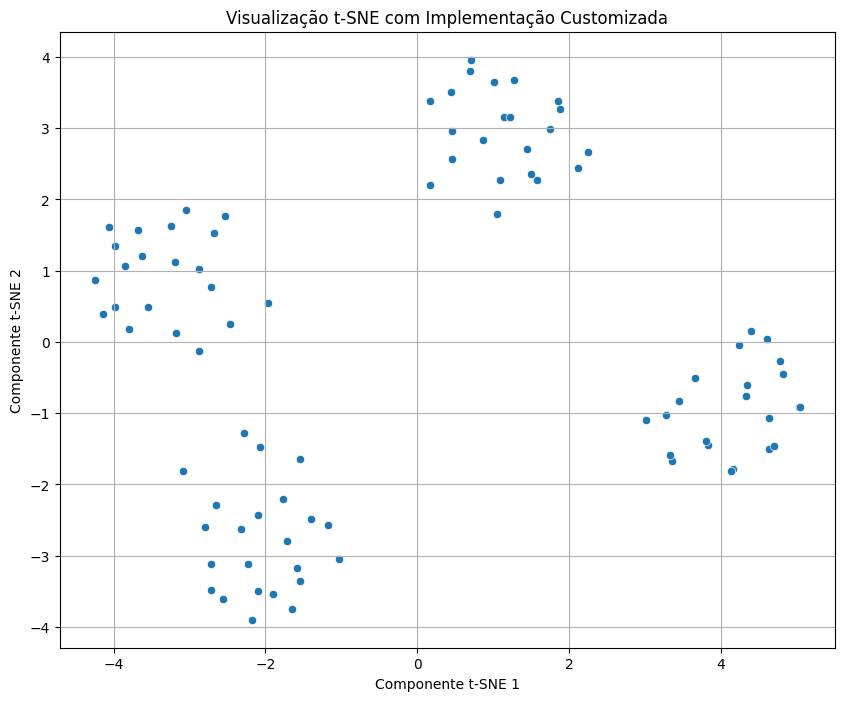

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_embedded_custom[:, 0],
    y=X_embedded_custom[:, 1]
)
plt.title('Visualização t-SNE com Implementação Customizada')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.grid(True)
plt.show()

## UMAP

Aplique **UMAP (Uniform Manifold Approximation and Projection)** como alternativa ao t-SNE.  
O UMAP é mais eficiente, preserva parte da estrutura global e é útil para visualização e pré-processamento.

**Tarefas:**
- Gere uma projeção 2D dos embeddings com `umap.UMAP`.  
- Experimente variar `n_neighbors` e `min_dist` para observar mudanças na distribuição dos clusters.  
- Compare visualmente com os resultados do PCA e t-SNE.

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.neighbors import NearestNeighbors

class UMAP:
    def __init__(self, n_neighbors=15, n_components=2, n_epochs=200, lr=0.5, random_state=None):
        self.n_neighbors = n_neighbors
        self.n_components = n_components
        self.n_epochs = n_epochs
        self.lr = lr
        self.random_state = np.random.RandomState(random_state)
        self.a, self.b = 1.929, 0.7915  # parâmetros da função de afinidade do UMAP

    def _find_sigma(self, distances, rho):
        """Busca binária para encontrar sigma."""
        target = np.log2(self.n_neighbors)
        low, high = 1e-3, 10.0
        for _ in range(30):
            mid = (low + high) / 2
            psum = np.sum(np.exp(-(np.maximum(0, distances - rho)) / mid))
            if abs(psum - target) < 1e-5:
                return mid
            if psum > target:
                high = mid
            else:
                low = mid
        return mid

    def _build_neighbor_graph(self, X):
        """Etapa 1: constrói o grafo de vizinhança baseado em distâncias."""
        n = X.shape[0]

        # Encontra os k vizinhos mais próximos de cada ponto
        knn = NearestNeighbors(n_neighbors=self.n_neighbors).fit(X)
        dists, inds = knn.kneighbors(X)

        # Calcular rho e sigma
        # rho_i: distância mínima não nula (define o raio local de cada ponto)
        # sigma_i: largura da distribuição local (ajustada por busca binária)
        rho = dists[:, 1]
        sigma = np.zeros(n)
        for i in range(n):
            sigma[i] = self._find_sigma(dists[i, 1:], rho[i])

        # Cria pares (i, j) para todas as conexões entre ponto i e seus vizinhos j
        rows = np.repeat(np.arange(n), self.n_neighbors)
        cols = inds.flatten()

        # Calcula distâncias entre cada ponto e seus vizinhos correspondentes
        dist = np.linalg.norm(X[rows] - X[cols], axis=1)

        # Subtrai o raio local rho_i e zera valores negativos
        dist = np.maximum(0, dist - rho[rows])

        # Converte distâncias em probabilidades (função de afinidade exponencial)
        p = np.exp(-dist / (sigma[rows] + 1e-8))

        # União fuzzy (p_ij + p_ji - p_ij*p_ji)
        p_matrix = np.zeros((n, n))
        p_matrix[rows, cols] = p
        p = p_matrix + p_matrix.T - p_matrix * p_matrix.T

        # Extrai apenas pares conectados e normaliza os pesos finais
        rows, cols = np.where(p > 0)
        p = p[rows, cols]
        p /= (p.max() + 1e-8)
        return rows, cols, p

    def _optimize_embedding(self, rows, cols, weights, Y):
        """Etapa 2: otimiza as posições no espaço reduzido."""
        eps = 1e-8
        for _ in range(self.n_epochs):
            # Atração entre vizinhos reais
            i = self.random_state.randint(0, len(weights), len(Y))
            j = cols[i]
            diff = Y[rows[i]] - Y[j]
            dist2 = np.sum(diff**2, axis=1)
            grad = (2 * self.a * self.b * (dist2 + eps)**(self.b - 1) /
                    (1 + self.a * (dist2 + eps)**self.b))[:, None] * diff
            Y[rows[i]] -= self.lr * grad
            Y[j] += self.lr * grad

            # Repulsão entre pares aleatórios
            neg_i = self.random_state.randint(0, len(Y), len(Y))
            neg_j = self.random_state.randint(0, len(Y), len(Y))
            diff = Y[neg_i] - Y[neg_j]
            dist2 = np.sum(diff**2, axis=1)
            grad = (-self.b / (1 + self.a * (dist2 + eps)**self.b))[:, None] * diff
            Y[neg_i] -= self.lr * grad

        return Y

    def fit_transform(self, X):
        """Executa o UMAP simplificado."""
        rows, cols, weights = self._build_neighbor_graph(X)
        Y = self.random_state.normal(scale=0.01, size=(X.shape[0], self.n_components))
        return self._optimize_embedding(rows, cols, weights, Y)

In [ ]:
n = sentence_embeddings.shape[0]
knn = NearestNeighbors(n_neighbors=3).fit(sentence_embeddings)
dists, inds = knn.kneighbors(sentence_embeddings)

rho = dists[:, 1]
sigma = np.zeros(n)

rows = np.repeat(np.arange(n), 3)
cols = inds.flatten()

dist = np.linalg.norm(sentence_embeddings[rows] - sentence_embeddings[cols], axis=1)
dist = np.maximum(0, dist - rho[rows])
p = np.exp(-dist / (sigma[rows] + 1e-8))

p_matrix = np.zeros((n, n))
p_matrix[rows, cols] = p

p_matrix.shape

(88, 88)

In [ ]:
# Instanciar e rodar o UMAP
simple_umap = UMAP(n_neighbors=30, n_components=2, n_epochs=500, random_state=42)
embedding = simple_umap.fit_transform(sentence_embeddings)

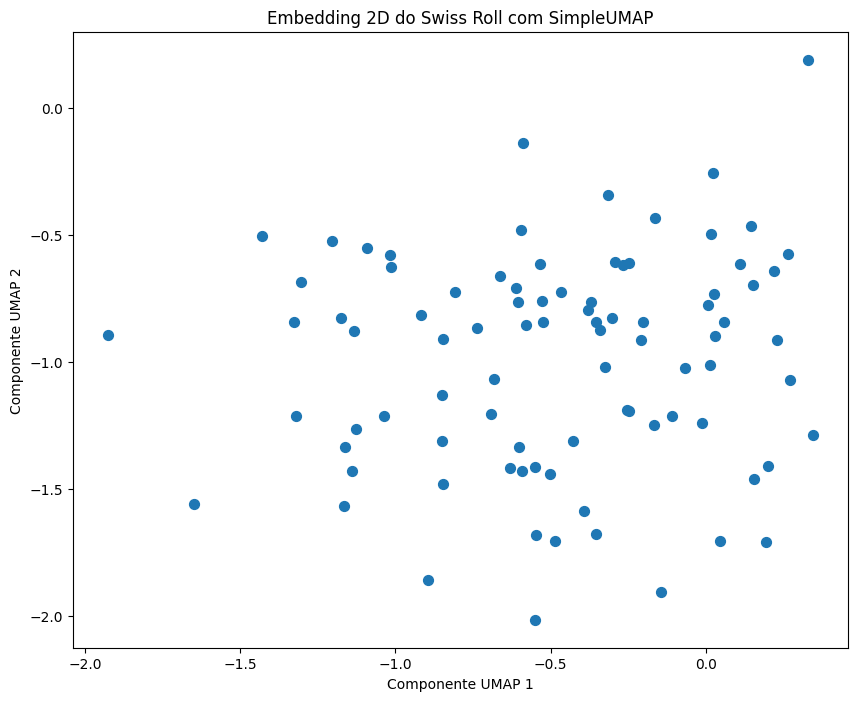

In [ ]:
# Plotar o embedding 2D
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=50)
plt.title("Embedding 2D do Swiss Roll com SimpleUMAP")
plt.xlabel("Componente UMAP 1")
plt.ylabel("Componente UMAP 2")
plt.show()

Variando o n_neighbors e o min_dist:

In [ ]:
n_neighbors_values = [5, 15, 30]
min_dist_values = [0.1, 0.5]

print(f"n_neighbors_values: {n_neighbors_values}")
print(f"min_dist_values: {min_dist_values}")

n_neighbors_values: [5, 15, 30]
min_dist_values: [0.1, 0.5]


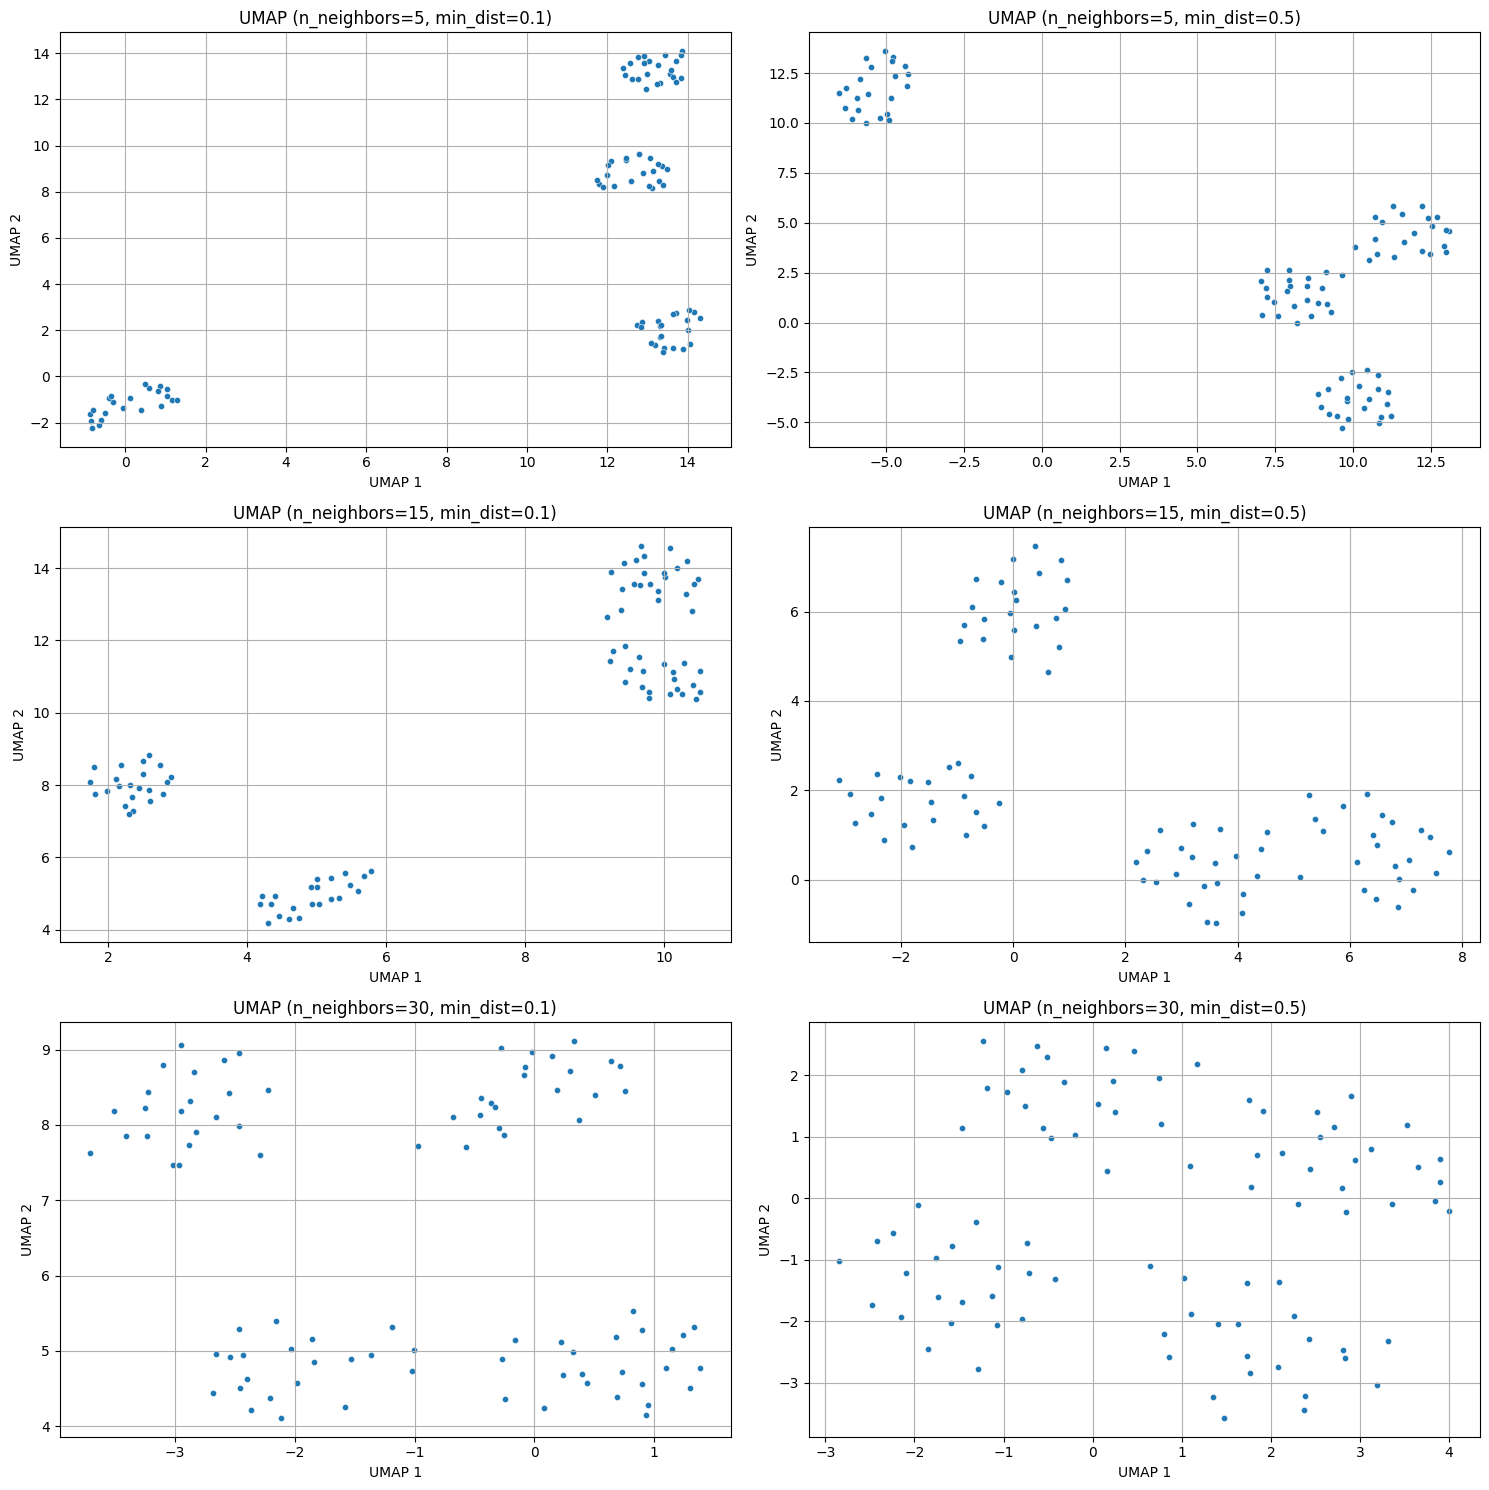

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
plot_num = 1

for n_neighbors in n_neighbors_values:
    for min_dist in min_dist_values:
        umap_reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist)
        umap_embeddings = umap_reducer.fit_transform(sentence_embeddings)

        plt.subplot(len(n_neighbors_values), len(min_dist_values), plot_num)
        sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], s=20)
        plt.title(f'UMAP (n_neighbors={n_neighbors}, min_dist={min_dist})')
        plt.xlabel('UMAP 1')
        plt.ylabel('UMAP 2')
        plt.grid(True)
        plot_num += 1

plt.tight_layout()
plt.show()

## Classificação

Com base nas categorias observadas nos gráficos anteriores, crie uma função simples que receba um texto e classifique-o na categoria mais provável.

**Tarefas:**
- Use os embeddings existentes e os clusters identificados para rotular automaticamente cada texto.  
- Crie uma função `classificar_texto(texto: str)` que:
  1. Gere o embedding do texto.
  2. Calcule a distância para os clusters identificados.
  3. Retorne o nome do cluster mais próximo.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# 1. Realizar o agrupamento KMeans para definir os clusters e seus centroides
# Assumindo 5 clusters para começar, baseado nas visualizações anteriores.
# Você pode ajustar este número se tiver uma expectativa diferente.
num_clusters = 5
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
kmeans_model.fit(sentence_embeddings)

cluster_labels = kmeans_model.labels_  # Rótulos para cada sentença original
cluster_centroids = kmeans_model.cluster_centers_  # Centroides dos clusters

def classificar_texto(texto: str, model, cluster_centroids, cluster_labels, original_sentences) -> str:
       # 1. Gerar o embedding do texto de entrada
    text_embedding = model.encode([texto])

    # 2. Calcular a distância (similaridade de cosseno) para cada centroide de cluster
    # Usamos 1 - cosine_similarity para obter uma distância, onde 0 é mais próximo.
    distances = 1 - cosine_similarity(text_embedding, cluster_centroids)

    # 3. Encontrar o cluster mais próximo
    closest_cluster_idx = np.argmin(distances)

    # Por simplicidade, vamos encontrar a sentença original mais próxima do centroide para dar um 'nome' descritivo.
    # Primeiro, obtenha os embeddings das sentenças que pertencem ao cluster mais próximo
    sentences_in_closest_cluster_indices = np.where(cluster_labels == closest_cluster_idx)[0]
    embeddings_in_closest_cluster = sentence_embeddings[sentences_in_closest_cluster_indices]

    # Calcule a similaridade do texto de entrada com todas as sentenças neste cluster
    similarities_to_cluster_sentences = cosine_similarity(text_embedding, embeddings_in_closest_cluster)

    # Encontre a sentença mais similar dentro do cluster para dar um nome descritivo
    most_similar_sentence_idx_in_cluster = np.argmax(similarities_to_cluster_sentences)
    original_idx = sentences_in_closest_cluster_indices[most_similar_sentence_idx_in_cluster]
    cluster_name = original_sentences[original_idx]

    return f"Cluster {closest_cluster_idx}: (Representado por: '{cluster_name}')"

In [ ]:
import random

# Escolher um texto aleatório da lista de sentenças
random_text = random.choice(sentences)

# Classificar o texto aleatório
categoria_aleatoria = classificar_texto(random_text, model, cluster_centroids, cluster_labels, sentences)

print(f"O texto aleatório selecionado é: '{random_text}'")
print(f"Ele pertence à categoria: {categoria_aleatoria}")

O texto aleatório selecionado é: 'Mount Everest is the highest peak above sea level.'
Ele pertence à categoria: Cluster 1: (Representado por: 'Mount Everest is the highest peak above sea level.')


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. Gerar o embedding do texto de entrada (apenas 10 elementos para nao ficar grande)
random_text_embedding = model.encode([random_text])
print(f"Embedding do texto de exemplo (primeiros 10 elementos):\n{random_text_embedding[0][:10]}...")

# 2. Calcular a distância (similaridade de cosseno) para cada centroide de cluster
# Usamos 1 - cosine_similarity para obter uma 'distância', onde 0 é mais próximo.
# A função cosine_similarity retorna valores entre -1 (totalmente oposto) e 1 (totalmente similar).
# Portanto, 1 - sim resultará em valores entre 0 (similar) e 2 (oposto).
distances_to_centroids = 1 - cosine_similarity(random_text_embedding, cluster_centroids)

print(f"\nDistâncias calculadas para cada centroide de cluster:\n{distances_to_centroids}")

# 3. Encontrar o cluster mais próximo
closest_cluster_idx = np.argmin(distances_to_centroids)
closest_distance = distances_to_centroids[0, closest_cluster_idx]
print(f"A menor distância é: {closest_distance:.5f}")

Embedding do texto de exemplo (primeiros 10 elementos):
[-0.03959154  0.02391152 -0.03597146 -0.04281262 -0.06816872 -0.01788134
 -0.05262038  0.0674787  -0.03078152 -0.01020468]...

Distâncias calculadas para cada centroide de cluster:
[[0.9752756 0.6248946 1.0324198 1.0264091 1.0451063]]
A menor distância é: 0.62489


In [ ]:
print(f"Texto aleatório selecionado: '{random_text}'")

text_embedding_rand = model.encode([random_text])

similarities_to_centroids = cosine_similarity(text_embedding_rand, cluster_centroids)[0]

closest_cluster_idx_rand = np.argmax(similarities_to_centroids)

# Uma cópia para não modificar o array original
temp_similarities = np.copy(similarities_to_centroids)
temp_similarities[closest_cluster_idx_rand] = -np.inf # Define como -infinito para ignorar

second_closest_cluster_idx_rand = np.argmax(temp_similarities)
second_closest_similarity_rand = temp_similarities[second_closest_cluster_idx_rand]

sentences_in_second_closest_cluster_indices = np.where(cluster_labels == second_closest_cluster_idx_rand)[0]
embeddings_in_second_closest_cluster = sentence_embeddings[sentences_in_second_closest_cluster_indices]
similarities_to_cluster_sentences = cosine_similarity(text_embedding_rand, embeddings_in_second_closest_cluster)

most_similar_sentence_idx_in_cluster = np.argmax(similarities_to_cluster_sentences)
original_idx = sentences_in_second_closest_cluster_indices[most_similar_sentence_idx_in_cluster]
second_closest_cluster_name = sentences[original_idx]

print(f"O cluster mais próximo é: Cluster {second_closest_cluster_idx_rand} (Similaridade: {second_closest_similarity_rand:.4f})")
print(f"Este cluster é representado por: '{second_closest_cluster_name}'")

Texto aleatório selecionado: 'Mount Everest is the highest peak above sea level.'
O cluster mais próximo é: Cluster 0 (Similaridade: 0.0247)
Este cluster é representado por: 'Sharpe ratio evaluates risk-adjusted performance.'
